### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Download stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Data Cleaning

In [ ]:
# Loading the provided 10,000 customer reviews dataset

df = pd.read_csv('amazonreviews.tsv', sep='\t')

In [ ]:
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [ ]:
### Data cleaning

def clean_text(text):
    # Remove HTML tags and special characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercasing and removing stopwords
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df.dropna(subset=['review'], inplace=True) # Handle missing reviews
df.drop_duplicates(inplace=True) # Remove duplicates
df['cleaned_review'] = df['review'].apply(clean_text)

### Exploratory Analysis

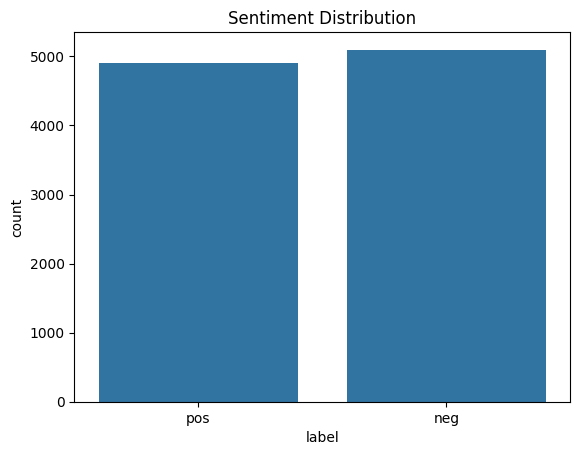

In [ ]:
# Sentiment distribution

sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.show()

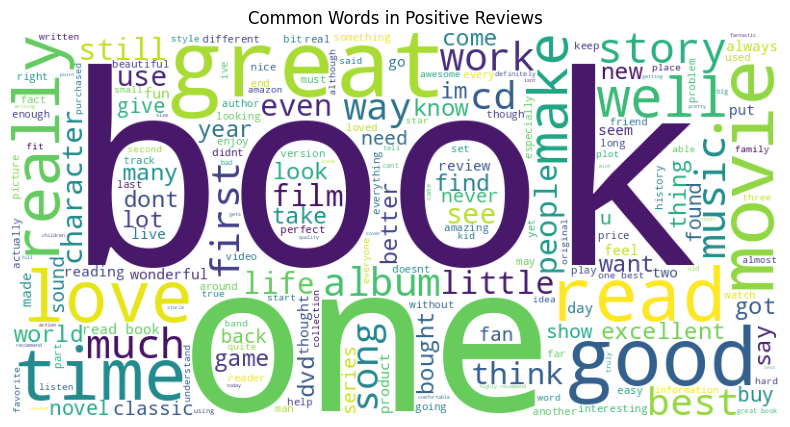

In [ ]:
# Word Cloud for Positive Reviews

pos_text = " ".join(df[df['label'] == 'pos']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos)
plt.title('Common Words in Positive Reviews')
plt.axis('off')
plt.show()

### Model Deployment

In [ ]:
# Convert labels to binary: pos -> 1, neg -> 0

df['label_idx'] = df['label'].map({'pos': 1, 'neg': 0})

In [ ]:
# Feature Extraction: TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['label_idx']

In [ ]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Validation

In [ ]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Accuracy metric
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}") # F1-score metric
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8425
F1-Score: 0.8375

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1037
           1       0.83      0.84      0.84       963

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

